# Part d: regression on 1Dim ising modellusing a multilayer perceptron (neural network)

In [1]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

from model_comparison import model_comparison
from resample import resample
import algorithms
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


from annCopy import NeuralNetMLP
from utils import train_test_split
%matplotlib inline

In [2]:
### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

"""
Comparing to project 1 - x = states, z = energies... 
Currently no y since we are in one dimension. 

"""

'\nComparing to project 1 - x = states, z = energies... \nCurrently no y since we are in one dimension. \n\n'

In [3]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2])) 
# build final data set
Data=[states,energies]

# define number of samples
n_samples=600
# define train and test data sets


In [4]:
X=Data[0]
Y=Data[1]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, split_size=0.5)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((5000, 1600), (5000,), (5000, 1600), (5000,))

In [6]:
"""
ann = NeuralNetMLPdeep(l2 = 0.0001, 
                   batch_size=10, 
                   epochs=50, 
                   n_hidden=30,
                   eta = 0.01,
                    tpe = "regression")

ann.fit(X_train, y_train, X_valid, y_valid)
ann.predict(X_valid)
# returns a list of the mean mse score for different epochs or batches
metric.append(ann.eval_["valid_preform"])
print(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))
"""

'\nann = NeuralNetMLPdeep(l2 = 0.0001, \n                   batch_size=10, \n                   epochs=50, \n                   n_hidden=30,\n                   eta = 0.01,\n                    tpe = "regression")\n\nann.fit(X_train, y_train, X_valid, y_valid)\nann.predict(X_valid)\n# returns a list of the mean mse score for different epochs or batches\nmetric.append(ann.eval_["valid_preform"])\nprint(" for lmd "+str(l) + " and eta: " + str(e) + "   performance is " + str(np.mean(ann.eval_["valid_preform"])))\n'

# Two layer MLP (Neural network )

In [8]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
#lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
epochs = [1, 10, 50, 100]
batchsize = [1, 10, 50]


for epoch in epochs:
    for e in eta:
        for batch in batchsize:
            ann = NeuralNetMLP(n_hidden=30, 
                               epochs=epoch, 
                               eta=e, 
                               shuffle=True,
                               batch_size=batch, 
                               activation='sigmoid', 
                               tpe = "regression")

            ann.fit(X_train, y_train, X_valid, y_valid)
            ann.predict(X_valid)
            # returns a list of the mean mse score for different epochs or batches
            metric.append(ann.eval_["valid_preform"])
            print("Sigmoid for nr of epochs "+str(epoch) + " and eta: " + str(e) + "  batchsize = " + str(batch) +"   performance is " + str(np.nanmean(ann.eval_["valid_preform"])))
        print("---------------------------")

Sigmoid for nr of epochs 1 and eta: 0.0001  batchsize = 1   performance is 39.5648454623
Sigmoid for nr of epochs 1 and eta: 0.0001  batchsize = 10   performance is 39.4842916819
Sigmoid for nr of epochs 1 and eta: 0.0001  batchsize = 50   performance is 39.4922761502
---------------------------
Sigmoid for nr of epochs 1 and eta: 0.001  batchsize = 1   performance is 9.33060354858
Sigmoid for nr of epochs 1 and eta: 0.001  batchsize = 10   performance is 7.04695010577
Sigmoid for nr of epochs 1 and eta: 0.001  batchsize = 50   performance is 6.57561933123
---------------------------
Sigmoid for nr of epochs 1 and eta: 0.01  batchsize = 1   performance is 4.2935884305
Sigmoid for nr of epochs 1 and eta: 0.01  batchsize = 10   performance is inf
Sigmoid for nr of epochs 1 and eta: 0.01  batchsize = 50   performance is 6.8600813969e+229
---------------------------
Sigmoid for nr of epochs 1 and eta: 0.1  batchsize = 1   performance is nan
Sigmoid for nr of epochs 1 and eta: 0.1  batchsiz

In [ ]:
"""
m = np.array(av).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Regression using sigmoid function", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15) #
plt.savefig("./results/figures/regression_ridge_nn_sigmoid_epochs_1.png")"""

In [9]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
#lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
epochs = [1, 10, 50, 100]
batchsize = [1, 10, 50]

# Om vi skal bruke elu så må vi tweeke alpha i tilegg.


for epoch in epochs:
    for e in eta:
        for batch in batchsize:
            ann = NeuralNetMLP(n_hidden=30, 
                               epochs=epoch, 
                               eta=e, 
                               alpha = 0.0001,
                               shuffle=True,
                               batch_size=batch, 
                               activation='elu', 
                               tpe = "regression")

            ann.fit(X_train, y_train, X_valid, y_valid)
            ann.predict(X_valid)
            # returns a list of the mean mse score for different epochs or batches
            metric.append(ann.eval_["valid_preform"])
            print("ELU for nr of epochs "+str(epoch) + " and eta: " + str(e) + "  batchsize = " + str(batch) +"   performance is " + str(np.nanmean(ann.eval_["valid_preform"])))
        print("---------------------------")

ELU for nr of epochs 1 and eta: 0.0001  batchsize = 1   performance is 26.8140355305
ELU for nr of epochs 1 and eta: 0.0001  batchsize = 10   performance is 27.7354392255
ELU for nr of epochs 1 and eta: 0.0001  batchsize = 50   performance is 23.1962262793
---------------------------
ELU for nr of epochs 1 and eta: 0.001  batchsize = 1   performance is nan
ELU for nr of epochs 1 and eta: 0.001  batchsize = 10   performance is nan
ELU for nr of epochs 1 and eta: 0.001  batchsize = 50   performance is nan
---------------------------
ELU for nr of epochs 1 and eta: 0.01  batchsize = 1   performance is nan
ELU for nr of epochs 1 and eta: 0.01  batchsize = 10   performance is nan
ELU for nr of epochs 1 and eta: 0.01  batchsize = 50   performance is nan
---------------------------
ELU for nr of epochs 1 and eta: 0.1  batchsize = 1   performance is nan
ELU for nr of epochs 1 and eta: 0.1  batchsize = 10   performance is nan
ELU for nr of epochs 1 and eta: 0.1  batchsize = 50   performance is 

KeyboardInterrupt: 

In [24]:
test_m = []
train_m = []

eta = [0.0001, 0.001, 0.01, 0.1, 1.0]

for e in eta:
    ann = NeuralNetMLP(batch_size=10,
                       epochs=50,
                       n_hidden=30,
                       eta = e,
                       activation="sigmoid",
                       tpe = "regression")

    ann.fit(X_train, y_train, X_valid, y_valid)
    ann.predict(X_valid)
    
    test_m.append(ann.eval_["valid_preform"])
    train_m.append(ann.eval_["train_preform"])

In [25]:
len(test_m)

5

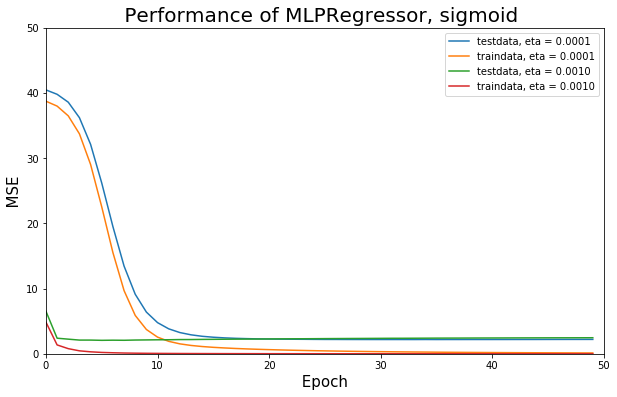

In [30]:
plt.figure(figsize=(10,6))
x = np.arange(len(test_m[0]))

for i in range(2):
    plt.plot(x, test_m[i], label = "testdata, eta = %.4f" %eta[i])
    plt.plot(x, train_m[i], label = "traindata, eta = %.4f" %eta[i])
    
plt.title(" Performance of MLPRegressor, sigmoid  ", fontsize = 20)
xmin, xmax, ymin, ymax = plt.axis([0,50,0,50])
plt.xlabel(" Epoch ", fontsize=15)
plt.ylabel("  MSE  ", fontsize=15)
plt.legend()
plt.savefig("./results/figures/MLPRegressor_sigmoid_MSE_50_epochs.png")

# Comparing to scikitlearn MLPregression

In [13]:
from sklearn.neural_network import MLPRegressor
from utils import mean_squared_error

In [14]:
mlp = MLPRegressor(hidden_layer_sizes=(30, ), 
                   activation = 'logistic', # this is the sigmoid activation function
                   solver = "sgd", 
                   alpha = 0.0001, 
                   batch_size =10, 
                   learning_rate_init=0.01)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
#logistic activation uses the sigmoid function 
mean_squared_error(y_pred, y_valid)

2.7991333169242338

In [17]:
mlp = MLPRegressor(hidden_layer_sizes=(30, ), 
                   activation = 'relu', 
                   solver = "sgd", 
                   alpha = 0.0001, 
                   batch_size =10, 
                   learning_rate_init=0.01)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)

In [16]:
mean_squared_error(y_pred, y_valid)

116.62759046688441